In [35]:
import numpy as np
import pandas as pd
import re
import os
from DS_Planck_Unet import *
from DS_detector import *
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from DS_healpix_fragmentation import radec2pix

In [2]:
int(re.search('ep(\d+)', 'act.ep0090-vl0.041928-l0.017998.hdf5')[0][2:])

90

In [3]:
def get_ep(s):
    return int(re.search('ep(\d+)', s)[0][2:])

In [4]:
dirname = '/home/rt2122/Models/act/ep90-100/'
files = next(os.walk(dirname))[-1]
files[0], get_ep(files[0])

('act.ep0095-vl0.041513-l0.017848.hdf5', 95)

In [5]:
step = 8

In [6]:
val_pix

[9, 38, 41]

In [7]:
cats_dict = {i : [] for i in range(90, 101)}
for file in tqdm(files):
    model = load_planck_model(os.path.join(dirname, file))
    ep = get_ep(file)
    for i in val_pix:
        all_dict = gen_pics_for_detection(i, model, step=step)
        cats_dict[ep].append(detect_clusters_connected(all_dict, thr=0.1, ipix=i))
    cats_dict[ep] = pd.concat(cats_dict[ep], ignore_index=True)
    cats_dict[ep].to_csv(
        '/home/rt2122/Data/scan_act/val_thr0.1_ep{ep}_step{step}.csv'.format(ep=ep, 
                step=step), index=False)

/home/rt2122/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
stat_df = pd.DataFrame({'planck_z' : [], 'planck_no_z':[], 'mcxcwp' : [], 'act':[], 
                       'fp':[]})

In [18]:
for ep in cats_dict:
    df = cats_dict[ep]
    cur_line = {}
    for cat in ['planck_z', 'planck_no_z', 'mcxcwp', 'act']:
        df_cat = df[df['catalog'] == cat]
        cur_line[cat] = np.count_nonzero(df_cat['status'] == 'tp') / len(df_cat)
    cur_line['fp'] = np.count_nonzero(df['status'] == 'fp')
    stat_df.loc[ep] = cur_line

In [19]:
stat_df

,planck_z,planck_no_z,mcxcwp,act,fp
90,0.825758,0.642857,0.048544,0.047259,509.0
91,0.856061,0.571429,0.067961,0.045369,443.0
92,0.886364,0.714286,0.077670,0.060491,692.0
93,0.833333,0.642857,0.077670,0.054820,512.0
94,0.833333,0.642857,0.067961,0.039698,390.0
95,0.856061,0.642857,0.077670,0.047259,574.0
96,0.840909,0.571429,0.067961,0.039698,487.0
97,0.856061,0.642857,0.067961,0.054820,512.0
98,0.856061,0.607143,0.067961,0.045369,497.0
99,0.840909,0.678571,0.067961,0.043478,496.0


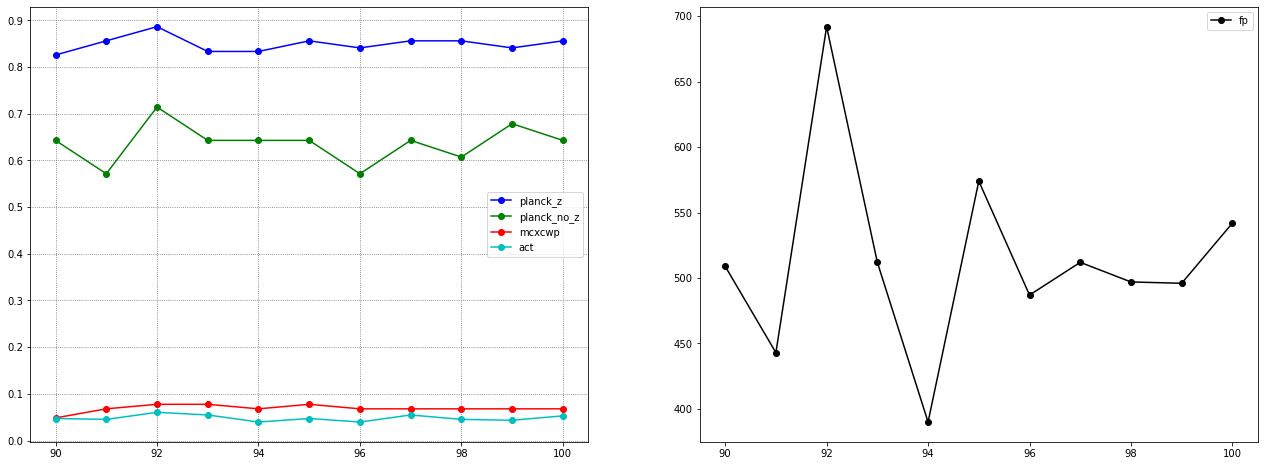

In [29]:
_, ax = plt.subplots(1, 2, figsize=(22, 8))
ax[0].grid(b=True, which='major', color='#666666', linestyle=':')
for cat, c in zip(['planck_z', 'planck_no_z', 'mcxcwp', 'act'], 'bgrc'):
    line, = ax[0].plot(stat_df.index, stat_df[cat], c+'o-')
    line.set_label(cat)
ax[0].set_yticks(np.arange(0, 1, 0.1))
ax[0].legend()
line, = ax[1].plot(stat_df.index, stat_df['fp'], 'ko-')
line.set_label('fp')
ax[1].legend()

In [30]:
dirname = '/home/rt2122/Models/act/ep40-50/'
files = next(os.walk(dirname))[-1]
files[0], get_ep(files[0])

('act.ep0049-vl0.037941-l0.020754.hdf5', 49)

In [31]:
cats_dict = {i : [] for i in range(40, 51)}
for file in tqdm(files):
    model = load_planck_model(os.path.join(dirname, file))
    ep = get_ep(file)
    for i in val_pix:
        all_dict = gen_pics_for_detection(i, model, step=step)
        cats_dict[ep].append(detect_clusters_connected(all_dict, thr=0.1, ipix=i))
    cats_dict[ep] = pd.concat(cats_dict[ep], ignore_index=True)
    cats_dict[ep].to_csv(
        '/home/rt2122/Data/scan_act/val_thr0.1_ep{ep}_step{step}.csv'.format(ep=ep, 
                step=step), index=False)

/home/rt2122/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
stat_df = pd.DataFrame({'planck_z' : [], 'planck_no_z':[], 'mcxcwp' : [], 'act':[], 
                       'fp':[]})
for ep in cats_dict:
    df = cats_dict[ep]
    cur_line = {}
    for cat in ['planck_z', 'planck_no_z', 'mcxcwp', 'act']:
        df_cat = df[df['catalog'] == cat]
        cur_line[cat] = np.count_nonzero(df_cat['status'] == 'tp') / len(df_cat)
    cur_line['fp'] = np.count_nonzero(df['status'] == 'fp')
    stat_df.loc[ep] = cur_line

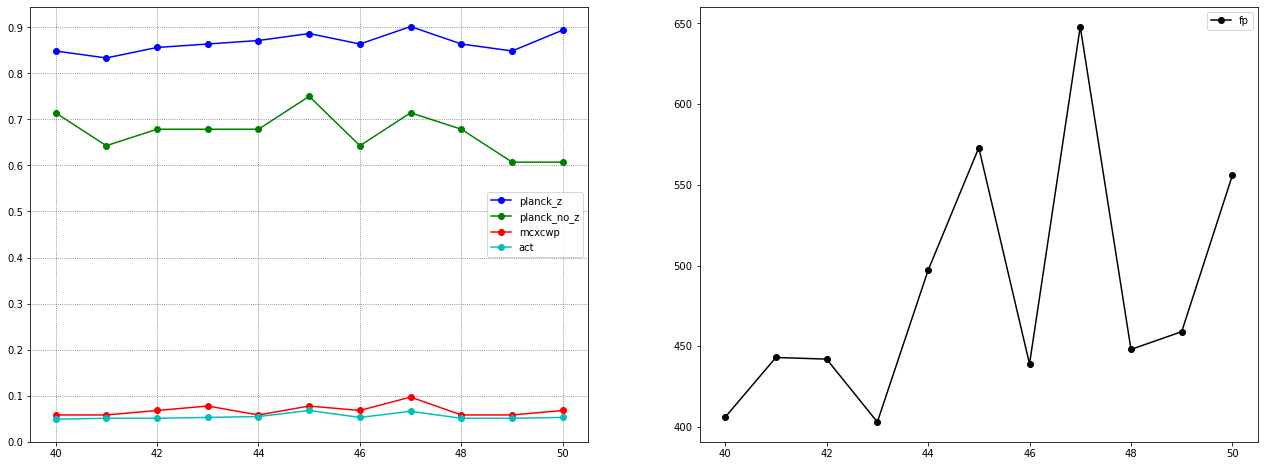

In [33]:
_, ax = plt.subplots(1, 2, figsize=(22, 8))
ax[0].grid(b=True, which='major', color='#666666', linestyle=':')
for cat, c in zip(['planck_z', 'planck_no_z', 'mcxcwp', 'act'], 'bgrc'):
    line, = ax[0].plot(stat_df.index, stat_df[cat], c+'o-')
    line.set_label(cat)
ax[0].set_yticks(np.arange(0, 1, 0.1))
ax[0].legend()
line, = ax[1].plot(stat_df.index, stat_df['fp'], 'ko-')
line.set_label('fp')
ax[1].legend()

In [34]:
act = pd.read_csv('/home/rt2122/Data/clusters/act.csv')

In [36]:
act['pix'] = radec2pix(act['RA'], act['DEC'], 2)

In [44]:
act_pix = pd.DataFrame({'count' : [np.count_nonzero(act['pix'] == pix) 
                                   for pix in range(48)]})
train_pix_act = set(train_pix).intersection(act_pix[act_pix['count'] > 50].index)

In [47]:
train_pix_act

{2, 8, 10, 11, 13, 15, 32, 33, 36, 37, 40, 42, 43, 44, 45, 46}